In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
%matplotlib inline
import os
os.chdir(r"C:\\Users\2112161\\OneDrive - Cognizant\Desktop\\DATA\\New folder\\scripsts python")
from scipy.stats import skew
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree

#curse of dimentionality(dimentionality means features)
https://www.youtube.com/watch?v=ToGuhynu-No&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=46
to avoid u do dimentionality reduction
1.feature selection
a forward selection
b backward elimination
c.bidirectional elimination

2 feature extraction
a PCA
b LDA
c


In [6]:
t=lambda x:x+2
l=[12,3,4,4,4,3]
list(map(lambda x:x+1,l))

[13, 4, 5, 5, 5, 4]

#regularization
this is done to prevent overfitting
for linear reg there are two
lasso(L1) and redge(L2) refer youtube

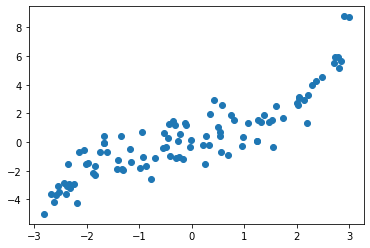

In [2]:
x=6*np.random.rand(100,1)-3
y=0.2*x**3 + 0.2*x**2 + 0.4*x +np.random.randn(100,1)
plt.scatter(x,y)

In [192]:
bos=datasets.load_boston()
bos=pd.DataFrame(bos.data,columns=bos.feature_names)
bos['house_price']=datasets.load_boston().target
bos

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [228]:
x=bos.iloc[:,:-1]
y=bos.drop(columns=x.columns)

In [229]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [230]:
lin=LinearRegression()
lin.fit(xtrain,ytrain)
print('r2 score',r2_score(lin.predict(xtest),ytest))
print('mean squre error',mean_squared_error(lin.predict(xtest),ytest))
print('mean abo erorr',mean_absolute_error(lin.predict(xtest),ytest))
print(lin.coef_)
#plt.scatter(xtest,lin.predict(xtest),color='red')
#plt.scatter(xtrain,ytrain,color='orange')
#plt.scatter(xtest,ytest)
lin_regressor=cross_val_score(lin,xtrain,ytrain,scoring='neg_mean_squared_error',cv=5)
print('neg MSE score',lin_regressor.mean())
print('test score',lin.score(xtest,ytest))#see poor on test mean overfitting
print('train score',lin.score(xtrain,ytrain))

r2 score 0.3523653008788751
mean squre error 33.44897999767649
mean abo erorr 3.842909220444504
[[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
  -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
   2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
  -4.92792725e-01]]
neg MSE score -21.17905505777572
test score 0.5892223849182514
train score 0.7730135569264234


In [231]:
las=Lasso()
las.fit(xtrain,ytrain)
print('r2 score',r2_score(las.predict(xtest),ytest))
print('mean squre error',mean_squared_error(las.predict(xtest),ytest))
print('mean abo erorr',mean_absolute_error(las.predict(xtest),ytest))
print(las.coef_)
#plt.scatter(xtest,lin.predict(xtest),color='red')
#plt.scatter(xtrain,ytrain,color='orange')
#plt.scatter(xtest,ytest)
lascv=cross_val_score(las,xtrain,ytrain,scoring='neg_mean_squared_error',cv=5)
print('cross val score',lascv.mean())
print('test score',las.score(xtest,ytest))#see poor on test mean overfitting
print('train score',las.score(xtrain,ytrain))
lascoef=pd.DataFrame(las.coef_,index=bos.columns[:-1],columns=['coeff'])
lascoef

r2 score -0.045381130996323016
mean squre error 41.700096799948994
mean abo erorr 4.315178745105937
[-0.05889028  0.05317657 -0.          0.         -0.          0.67954962
  0.01684077 -0.6487664   0.198738   -0.01399421 -0.86421958  0.00660309
 -0.73120957]
cross val score -26.043454839963953
test score 0.48789271561192615
train score 0.7170467166597749


,coeff
CRIM,-0.058890
ZN,0.053177
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.679550
AGE,0.016841
DIS,-0.648766
RAD,0.198738
TAX,-0.013994


In [232]:
rid=Ridge()
rid.fit(xtrain,ytrain)
print('r2 score',r2_score(rid.predict(xtest),ytest))
print('mean squre error',mean_squared_error(rid.predict(xtest),ytest))
print('mean abo erorr',mean_absolute_error(rid.predict(xtest),ytest))
print(rid.coef_)
#plt.scatter(xtest,lin.predict(xtest),color='red')
#plt.scatter(xtrain,ytrain,color='orange')
#plt.scatter(xtest,ytest)
lascv=cross_val_score(rid,xtrain,ytrain,scoring='neg_mean_squared_error',cv=5)
print('cross val score',lascv.mean())
print('test score',rid.score(xtest,ytest))#see poor on test mean overfitting
print('train score',rid.score(xtrain,ytrain))
ridcoef=pd.DataFrame(rid.coef_.reshape(13,1),index=bos.columns[:-1],columns=['coeff'])
ridcoef

r2 score 0.3324790826808204
mean squre error 34.23160611061534
mean abo erorr 3.836948822289118
[[-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
  -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
   2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
  -4.98849035e-01]]
cross val score -21.468048632810444
test score 0.5796111714164927
train score 0.7711260446978171


,coeff
CRIM,-0.116808
ZN,0.046003
INDUS,-0.023762
CHAS,2.278150
NOX,-8.557796
RM,3.755135
AGE,-0.010414
DIS,-1.280095
RAD,0.222038
TAX,-0.011526


In [233]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lascv=GridSearchCV(las,parameters,scoring='neg_mean_squared_error',cv=5)
lascv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 2.838e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+03, tolerance: 2.873e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.063e+03, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [234]:
print(lascv.best_params_)
print(lascv.best_score_)#lasso little score improved but mostly used is lasso due to feature selection

{'alpha': 1e-15}
-21.179055057775777


In [235]:
las1=Lasso(alpha=1e-15)
las1.fit(xtrain,ytrain)
cv=cross_val_score(las1,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error')
cv.mean()

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.694e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 2.838e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+03, to

-21.179055057775777

In [236]:
rid1=Ridge(alpha=1e-15)
rid1.fit(xtrain,ytrain)
cv=cross_val_score(rid1,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error')
cv.mean()

-21.17905505777575

In [237]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
rid=GridSearchCV(rid,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
rid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [238]:
print(rid.best_params_)
print(rid.best_score_)#further btr

{'alpha': 1e-15}
-21.17905505777575


In [239]:
rid1=Ridge(alpha=1e-15)
rid1.fit(xtrain,ytrain)
r2_score(rid1.predict(xtest),ytest)#see above lasso is btr

0.3523653008788721

In [240]:
a=pd.concat([ridcoef,lascoef],axis=1)
a.columns=['ridge','lasso']
a
#below u can see lass ref coeff which are not imp are made to 0 means it help it feature selection

,ridge,lasso
CRIM,-0.116808,-0.058890
ZN,0.046003,0.053177
INDUS,-0.023762,-0.000000
CHAS,2.278150,0.000000
NOX,-8.557796,-0.000000
RM,3.755135,0.679550
AGE,-0.010414,0.016841
DIS,-1.280095,-0.648766
RAD,0.222038,0.198738
TAX,-0.011526,-0.013994


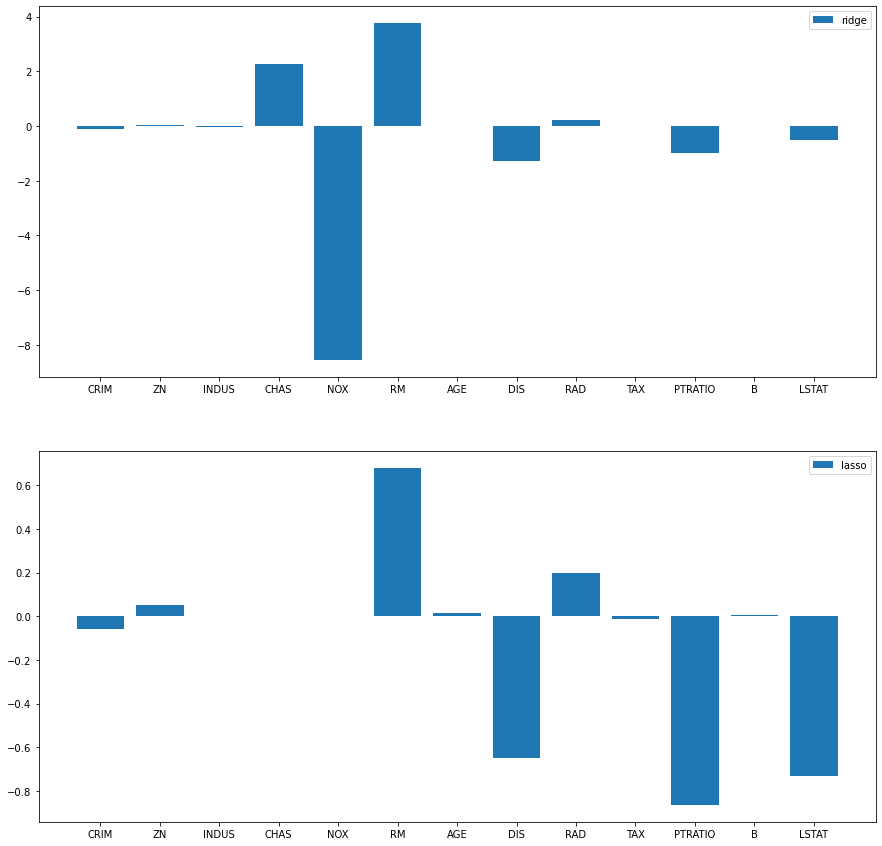

In [241]:
plt.rcParams['figure.figsize']=(15,15)
plt.subplot(2,1,1)
plt.bar(a.index,a.ridge,label='ridge')
plt.legend()
plt.subplot(2,1,2)
plt.bar(a.index,a.lasso,label='lasso')
plt.legend()
plt.show()
#seel below RM has reduce in lasso and feature selection done

In [ ]:
#so let remove the above feature from lass and rerun

In [242]:
a[a.lasso==0].index

Index(['INDUS', 'CHAS', 'NOX'], dtype='object')

In [255]:
x1=x.drop(columns=a[a.lasso==0].index)
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,train_size=0.8,random_state=0)
las2=Lasso()
las2.fit(xtrain,ytrain)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
cv=GridSearchCV(las2,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
cv.fit(xtrain,ytrain)


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+03, tolerance: 2.838e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e+03, tolerance: 2.873e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+03, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [256]:
print(cv.best_score_)
print(cv.best_params_)
#print(las2.score(xtest,ytest))


-21.794596021477922
{'alpha': 0.01}


In [261]:
las2=Lasso(alpha=0.01)
las2.fit(xtrain,ytrain)
r2_score(las2.predict(xtest),ytest)
cross_val_score(las2,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-21.794596021477922

In [259]:
from sklearn import metrics
metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [252]:
print(las2.score(xtest,ytest))
#little btr than ridge

0.5557267455185927


In [267]:
rid2=Lasso(alpha=1e-15)
rid2.fit(xtrain,ytrain)
print(rid2.score(xtest,ytest))#so if alphe is low over fitting, alpha is high under fitting so need to keep optimum value

0.5558354547335722


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.538e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(


In [198]:
print(lin.score(xtest,ytest))
#print(mean_squared_er(xtest,ytest))

0.5892223849182512


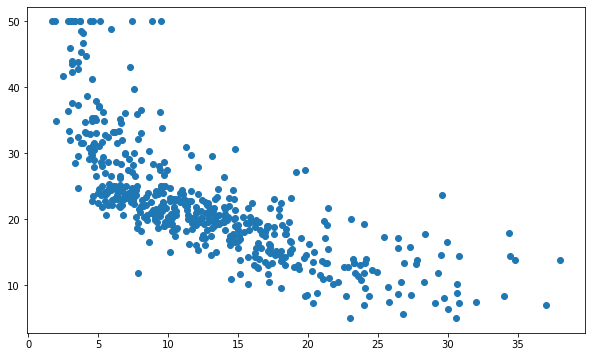

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(bos.LSTAT,bos.house_price)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

0.873198164726634
0.868206098852678
0.8650741481778356


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.21258e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.57263e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


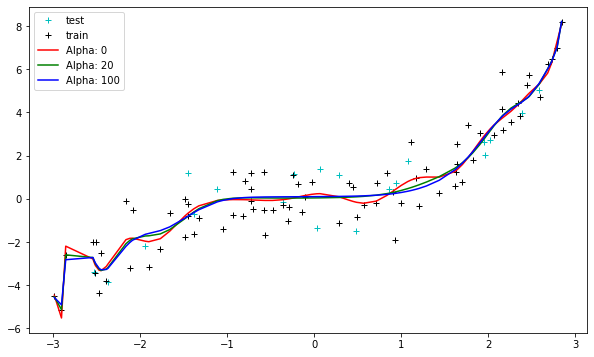

In [347]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=20)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    print(r2_score(model.predict(x1),x2))
    return model.predict(x1)

alphas = [0,20, 100]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(xtest, ytest, 'c+', label='test')
plt.plot(xtrain, ytrain, 'k+', label='train')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x, y, alpha)
    # Plot
    plt.plot(sorted(x[:, 0]), preds[np.argsort(x[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()#alpha =20 or middle values in paha perfomr btr

In [200]:
np.random.randn(10)

array([-2.04900864,  1.24788156, -0.30798413, -0.83026434, -0.49486652,
       -1.92571113, -0.45676889,  1.74754049,  1.40570397,  0.05590729])

In [238]:
df2

,age,YearsExperience,Salary
0,30,1.1,39343.0
1,31,1.3,46205.0
2,32,1.5,37731.0
3,33,2.0,43525.0
4,34,2.2,39891.0
5,35,2.9,56642.0
6,36,3.0,60150.0
7,37,3.2,54445.0
8,38,3.2,64445.0
9,39,3.7,57189.0


In [146]:
x=df2.iloc[:,:-1]
y=df2.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

0.6640797396665582
113092019.2650557
9513.326430844034
[[-2372.00800772 18269.32327602]]


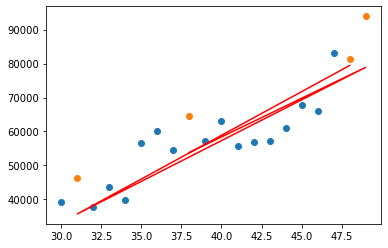

In [147]:
lin=LinearRegression()
lin.fit(xtrain,ytrain)
print(r2_score(lin.predict(xtest),ytest))
print(mean_squared_error(lin.predict(xtest),ytest))
print(mean_absolute_error(lin.predict(xtest),ytest))
print(lin.coef_)
plt.plot(xtest['age'],lin.predict(xtest),color='red')
plt.scatter(xtrain['age'],ytrain)
plt.scatter(xtest['age'],ytest)

0.664077398068806
113092026.56091753
9513.340082069377
[-2371.93648837 18269.02139429]


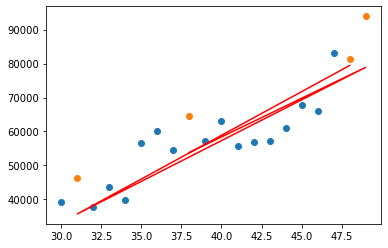

In [163]:
las=Lasso(alpha=0.01)
las.fit(xtrain,ytrain)
print(r2_score(las.predict(xtest),ytest))
print(mean_squared_error(las.predict(xtest),ytest))
print(mean_absolute_error(las.predict(xtest),ytest))
print(las.coef_)
plt.plot(xtest['age'],las.predict(xtest),color='red')
plt.scatter(xtrain['age'],ytrain)
plt.scatter(xtest['age'],ytest)

0.6144072109153972
170986866.52274773
12127.502799790358
[[1980.66008519  685.31572034]]


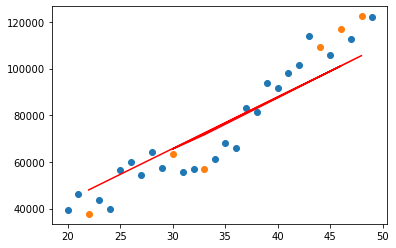

In [88]:
rid=Ridge(alpha=550)#alpha is same a lambda as in video alpha=0 means same as linear reg change aplha and see variations
rid.fit(xtrain,ytrain)
print(r2_score(rid.predict(xtest),ytest))
print(mean_squared_error(rid.predict(xtest),ytest))
print(mean_absolute_error(rid.predict(xtest),ytest))
print(rid.coef_)
plt.plot(xtest['age'],rid.predict(xtest),color='red')
plt.scatter(xtrain['age'],ytrain)
plt.scatter(xtest['age'],ytest)